# Анализ бизнес-показателей приложения Procrastinate Pro+

### Описание проекта

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.  
Вам предстоит изучить:  
откуда приходят пользователи и какими устройствами они пользуются,  
сколько стоит привлечение пользователей из различных рекламных каналов;  
сколько денег приносит каждый клиент,  
когда расходы на привлечение клиента окупаются,  
какие факторы мешают привлечению клиентов.  

### Описание данных  
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.  

Структура visits_info_short.csv:  
User Id — уникальный идентификатор пользователя,  
Region — страна пользователя,  
Device — тип устройства пользователя,  
Channel — идентификатор источника перехода,  
Session Start — дата и время начала сессии,  
Session End — дата и время окончания сессии.  
Структура orders_info_short.csv:  
User Id — уникальный идентификатор пользователя,  
Event Dt — дата и время покупки,  
Revenue — сумма заказа.  
Структура costs_info_short.csv:  
dt — дата проведения рекламной кампании,  
Channel — идентификатор рекламного источника,  
costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # визиты 
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  # расходы
)



Посмотрим на то, как выглядят данные, для понимания общей картины

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
visits

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [10]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [11]:
costs.columns = costs.columns.str.lower()
costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [12]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [13]:
#проверка пропусков
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [14]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [15]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [16]:
# статистические показатели таблиц
display(visits.describe())
display(orders.describe())
costs.describe()

,user_id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [17]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

***Вывод***

__Используются данные трех таблиц с информацией о посещениях сайта, информацией о заказах и информацией о затратах на рекламу.
Анализ проводится по 4 странам: США, Великобритания, Франция и Германия. Категории устройств пользователя: iPhone, Android, PC, Mac.
Названия столбцов имеют заглавные буквы и пробелы, которые я заменела на строчные буквы и нижнее подчеркивание. Значения столбцов с датами были преобразованы из строк в datetime64.
Пропущенные и дублирующиеся значения в таблицах отсутствуют.__

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [18]:
# функция для создания пользовательских профилей

# функция создания профилей
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

__Созданы функции для расчета и анализа создания профилей пользователей, для подсчёта Retention Rate, для подсчёта конверсии, для подсчёта LTV.
LTV - общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок.
Retention Rate показывает, как долго клиенты остаются с компанией.
А также функции для построения графиков для сглаживания данных, для построения графика Retention Rate, для построения графика конверсии, для визуализации LTV и ROI.__

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [26]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [27]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [28]:
# создание опции «игнорировать горизонт»
ignore_horizon = False

In [29]:
# минимальная дата привлечения пользователей
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [30]:
# минимальная дата привлечения пользователей
min_analysis_date = profiles['dt'].max()
min_analysis_date

datetime.date(2019, 10, 27)

In [31]:
# страны и платящие пользователи
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}).style.format('{:.0%}')

In [32]:
# устройства и платящие пользователи
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
device['share'] = round(device.payer / device.user_id, 2)
device

,user_id,payer,share
device,,,
iPhone,54479,3382,0.06
Android,35032,2050,0.06
Mac,30042,1912,0.06
PC,30455,1537,0.05


In [33]:
# каналы и платящие пользователи
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channel['share'] = round(channel.payer / channel.user_id, 2)
channel

,user_id,payer,share
channel,,,
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
organic,56439,1160,0.02
WahooNetBanner,8553,453,0.05
AdNonSense,3880,440,0.11
RocketSuperAds,4448,352,0.08
LeapBob,8553,262,0.03
OppleCreativeMedia,8605,233,0.03
lambdaMediaAds,2149,225,0.10


# Вывод

__Момент анализа составляет 1 ноября 2019 г., горизонт анализа - 14 дней.
Минимальная дата привлечения пользователей - 1 мая 2019 г. Максимальная дата с учетом горизонта - 19 октября 2019 г.
Пользователи из 4 стран: Германия, Фпанция, Великобритания, США. США лидируют по количеству пользователей приложения. Также и доля платящих пользователей выше в США - 7%.
Клиенты пользуются устройствами: iPhone, Android, Mac и PC. iPhone первый среди всех клиентов, включая платящих. Количество клиентов - 5448 тыс., среди них платящих пользователей - 3382. Доля платящих пользователей для iPhone, Android и Mac составляет 6%, для PC - 5%.
Количество рекламных источников привлечения - 10. Но больше всего пользователей органических - 56449. Они же на третьем месте по количеству платящих пользователей в абсолютном выражении - 1160. Наибольшее количество пользователей из FaceBoom -29144 и TipTop - 19561.
Доля платящих пользователей распределена следующим образом:
FaceBoom - 12%
AdNonSense - 11%
TipTop - 10%
lambdaMediaAds - 10%.
Наименьшая доля платящих пользователей у тех, кто не пришел с рекламных источников - всего 2%.__

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [34]:
# общая сумму расходов на маркетинг
round(costs.costs.sum(), 2)

105497.3

In [35]:
# потрачено денег на каждый источник
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [36]:
# создание новых столбцов и преобразование типа данных
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month

In [37]:
# потрачено всего денег по времени
costs.groupby('month').agg({'costs': 'sum'})

,costs
month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


In [38]:
costs

,dt,channel,costs,month
0,2019-05-01,FaceBoom,113.3,5
1,2019-05-02,FaceBoom,78.1,5
2,2019-05-03,FaceBoom,85.8,5
3,2019-05-04,FaceBoom,136.4,5
4,2019-05-05,FaceBoom,122.1,5
...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10
1796,2019-10-24,lambdaMediaAds,6.4,10
1797,2019-10-25,lambdaMediaAds,8.8,10
1798,2019-10-26,lambdaMediaAds,8.8,10


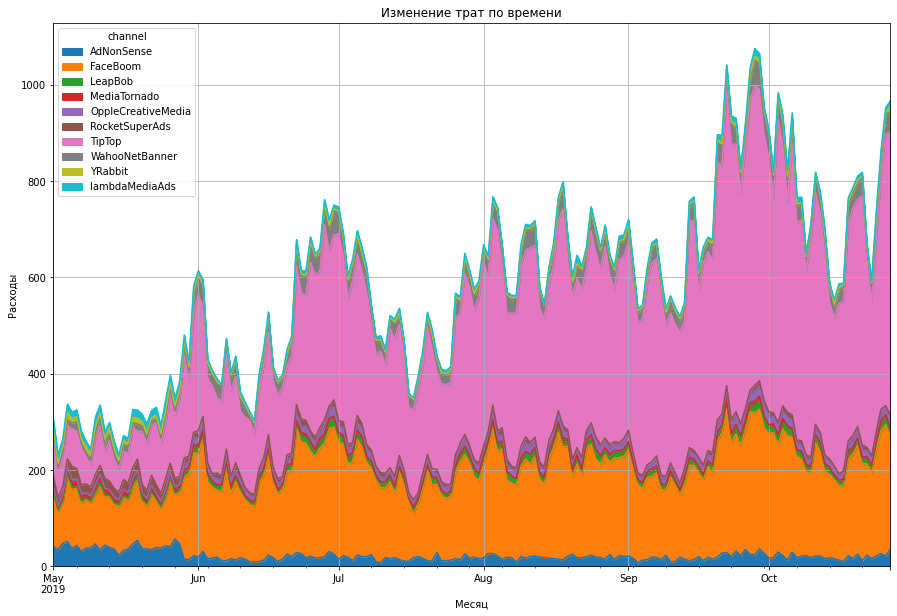

In [39]:
# визуализация изменений трат во времени
costs.pivot_table(
    index='dt',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
).plot.area(figsize=(15, 10), grid=True)

plt.title('Изменение трат по времени')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

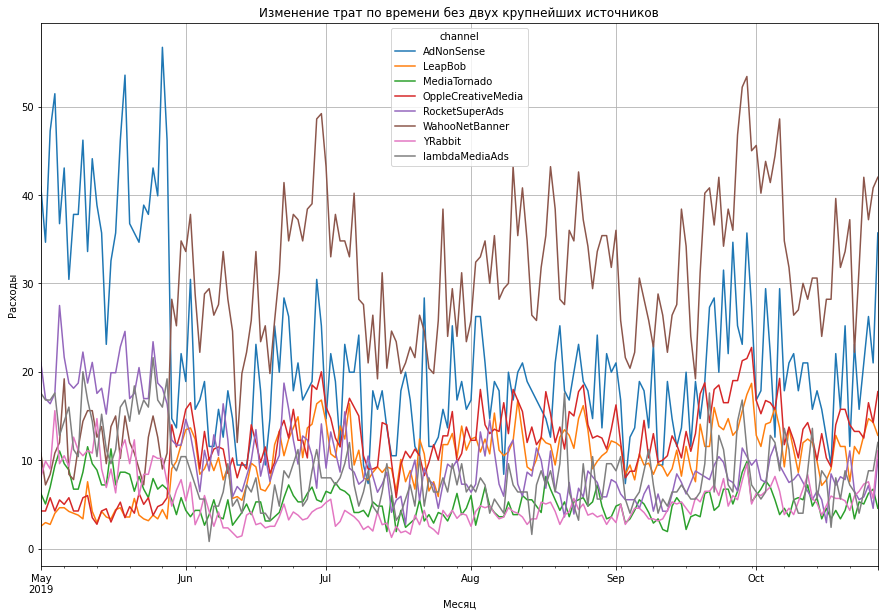

In [40]:
costs2 = costs[(costs.channel != 'FaceBoom') & (costs.channel != 'TipTop')]
costs2.pivot_table(
    index='dt',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по времени без двух крупнейших источников')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

In [41]:
# находим LTV с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [42]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-15,674
2019-10-16,656
2019-10-17,703


In [43]:
# средний CAC по каналам привлечения
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)
round(cac, 2)

,cac
channel,
AdNonSense,1.01
FaceBoom,1.11
LeapBob,0.21
MediaTornado,0.22
OppleCreativeMedia,0.25
RocketSuperAds,0.42
TipTop,2.76
WahooNetBanner,0.60
YRabbit,0.22


In [44]:
# средний CAC по всему проекту
cac_total = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
round(cac_total, 2)

acquisition_cost    0.69
dtype: float64

In [45]:
# средний CAC по всему проекту без органических пользователей
ltv_profiles[ltv_profiles.channel != 'organic']
cac_no_organic = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
round(cac_no_organic, 2)

acquisition_cost    0.69
dtype: float64

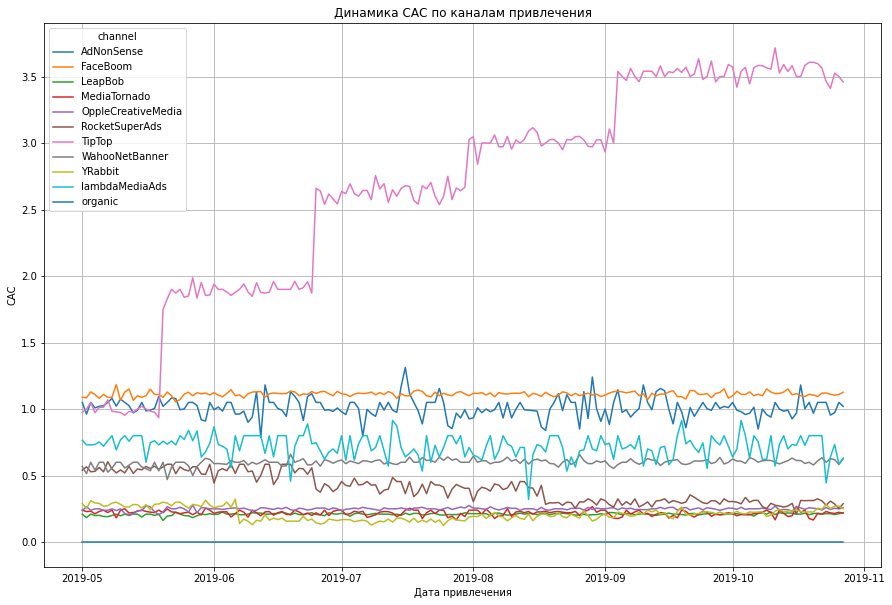

In [46]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

# Вывод
__Общая сумма расходов на маркетинг составила 105497.3. Наибольше расходы составили на канал TipTop - 54751,3. и FaceBoom - 32445,6. Расходы на остальные каналы существенно ниже, например, на третьем месте - WahooNetBanner с 5151. Последние места занимают канал YRabbit (944,22) и MediaTornado (954,48). Каждый месяц с мая по сентябрь расходы на маркетинг росли. График изменения расходов по времени показал, что траты на TipTop возрастали с каждым месяцем. Траты на FaceBoom росли гораздо медленнее.На остальные источники расходовали гораздо меньше.
Стоимость привлечения органических пользователей во всех когортах, распределенных по каналам, равна нулю, потому что они не были привлечены за счет рекламы. Привлечение одного пользователя из канал TipTop обошлось компании в среднем в 2,76, из FaceBoom - 1,11, из AdNonSense - 1,01. Если по большинству каналов расходы на протяжении всего времени были примерно равномерными, то TipTop выделяется, потому что расходы на одного пользователя росли почти каждый месяц. Средний CAC по всему проекту составил 0,69__

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [47]:
# исключение органических пользователей из таблицы
profiles = profiles.query('channel != "organic"')

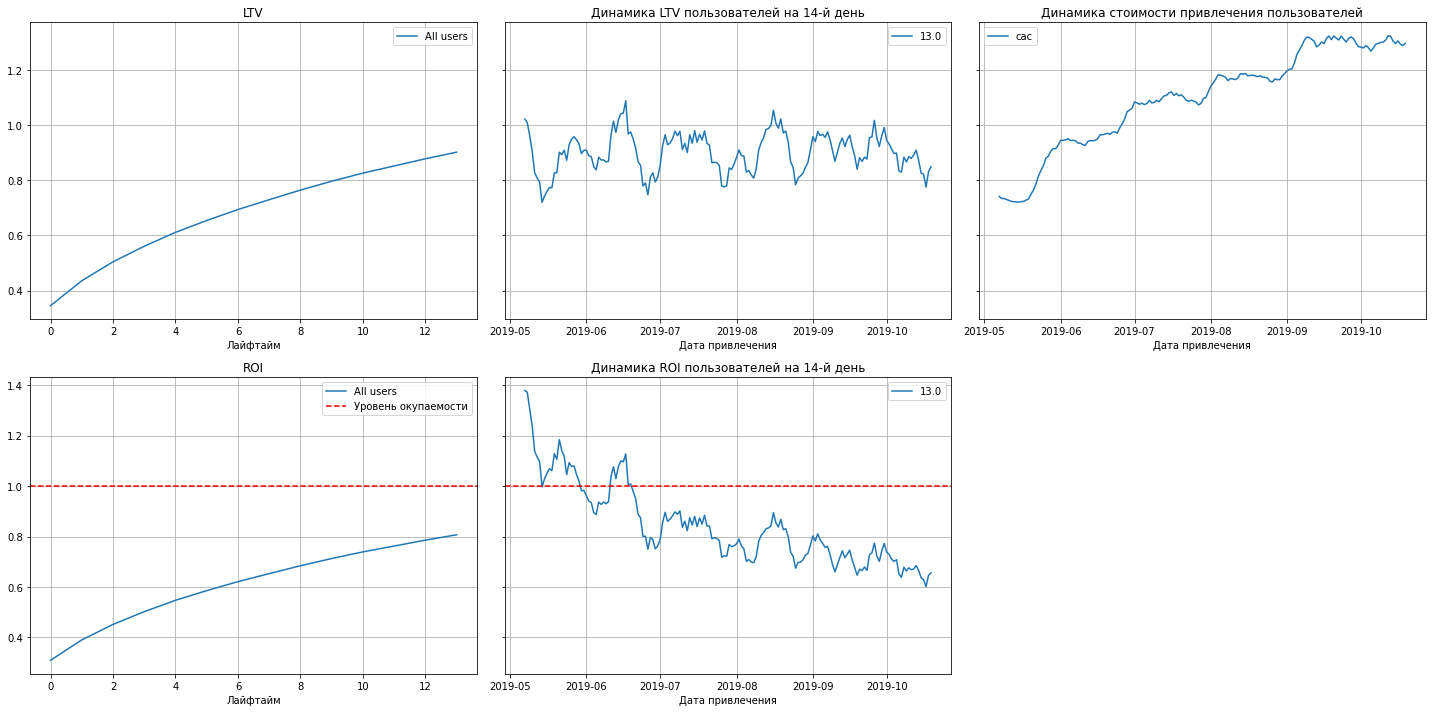

In [48]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

ROI находится ниже уровня окупаемости. Динамика ROI пользователей на 14-й день падает все больше со временем. Динамика стоимости привлечения пользователей постепенно увеличивалась. LTV достаточно стабильно растет.

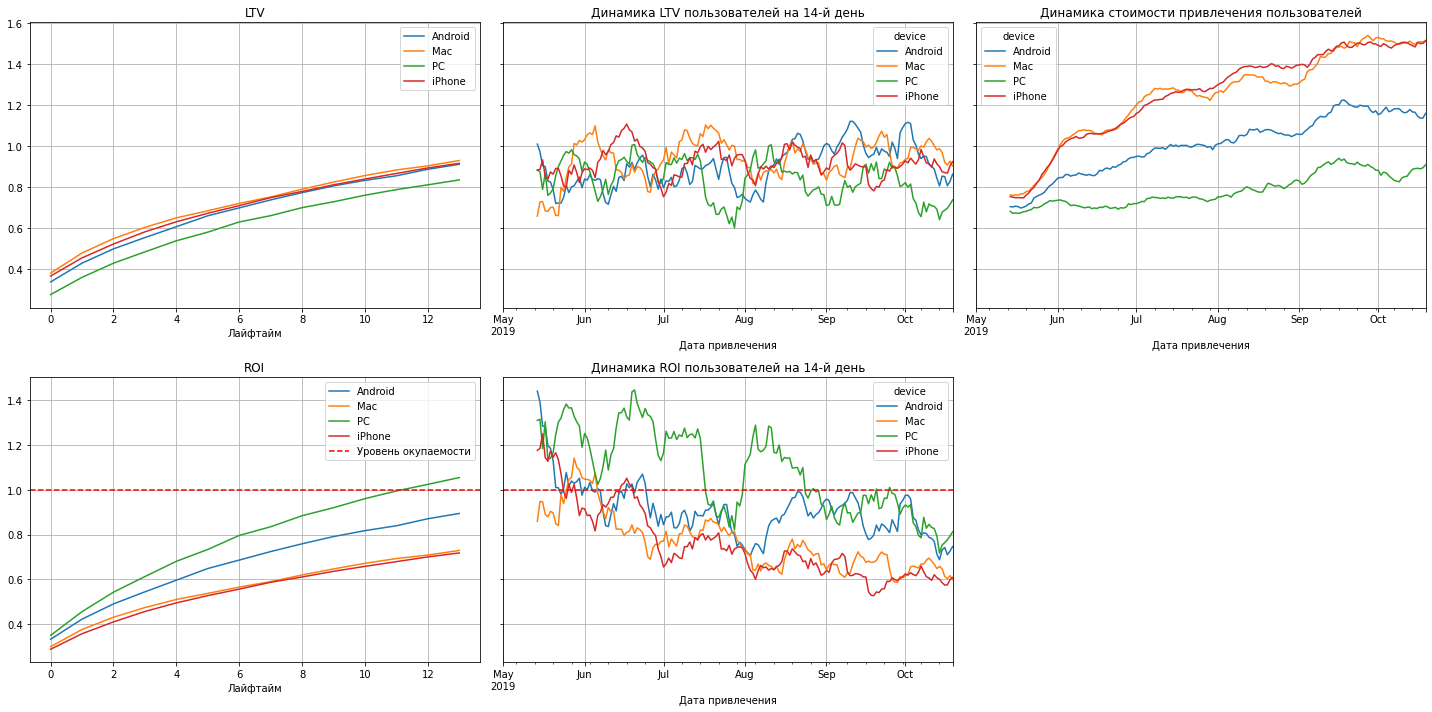

In [49]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи PC окупаются, в отличие от Android, Mac и iPhone. Динамика стоимости привлечения клиентов показывает, что наименьшие расходы были как раз в отношении пользователей PC. На графике заметно снижение динамики ROI у всех устройств при росте стоимости привлечения пользователей.

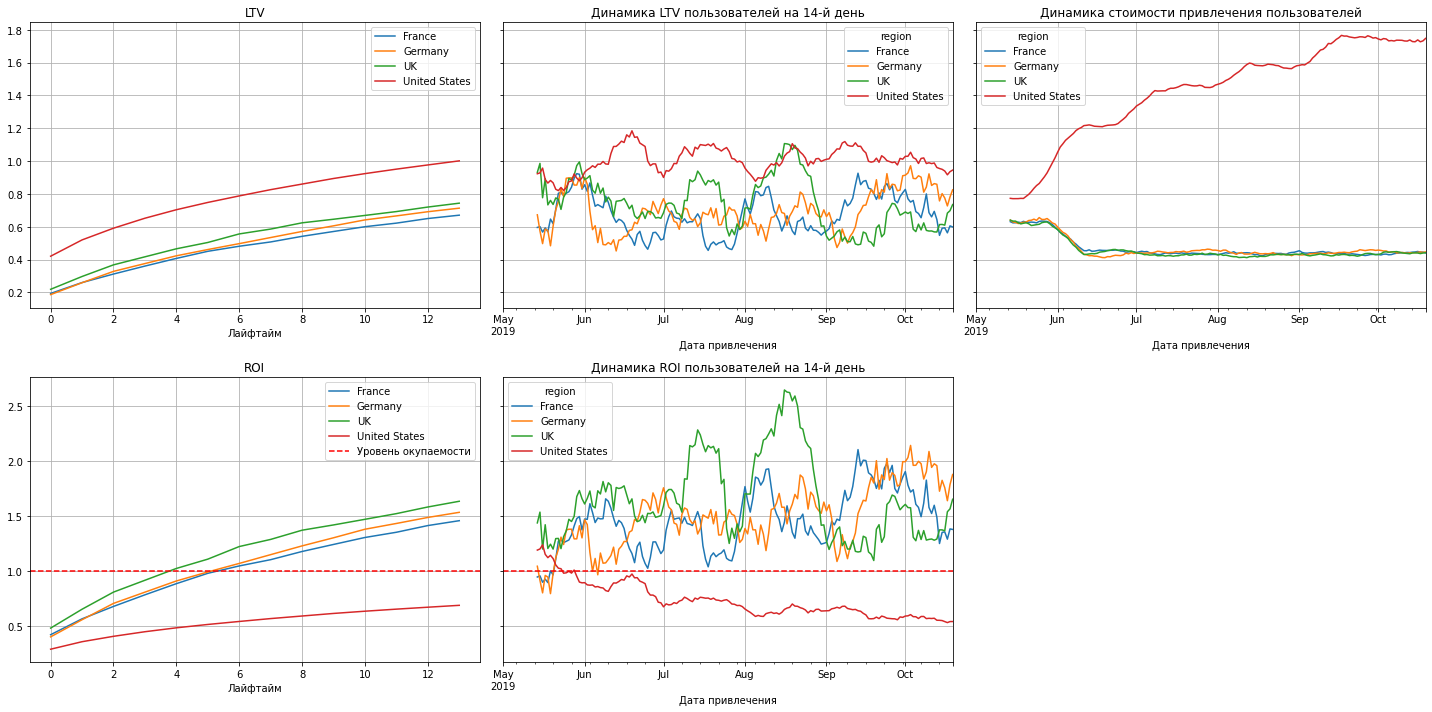

In [50]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупилась только в США. Динамика стоимости привлечения пользователей показывает огромный разрыв расходов в США по сравнению с другими странами; стоимость в США существенно выше. Динамика ROI показывает снижение окупаемости на пользователя из США ниже уровня безубыточности. Динамика LTV подвержена сезонности и стабильна. LTV в США выше, чем в других странах.

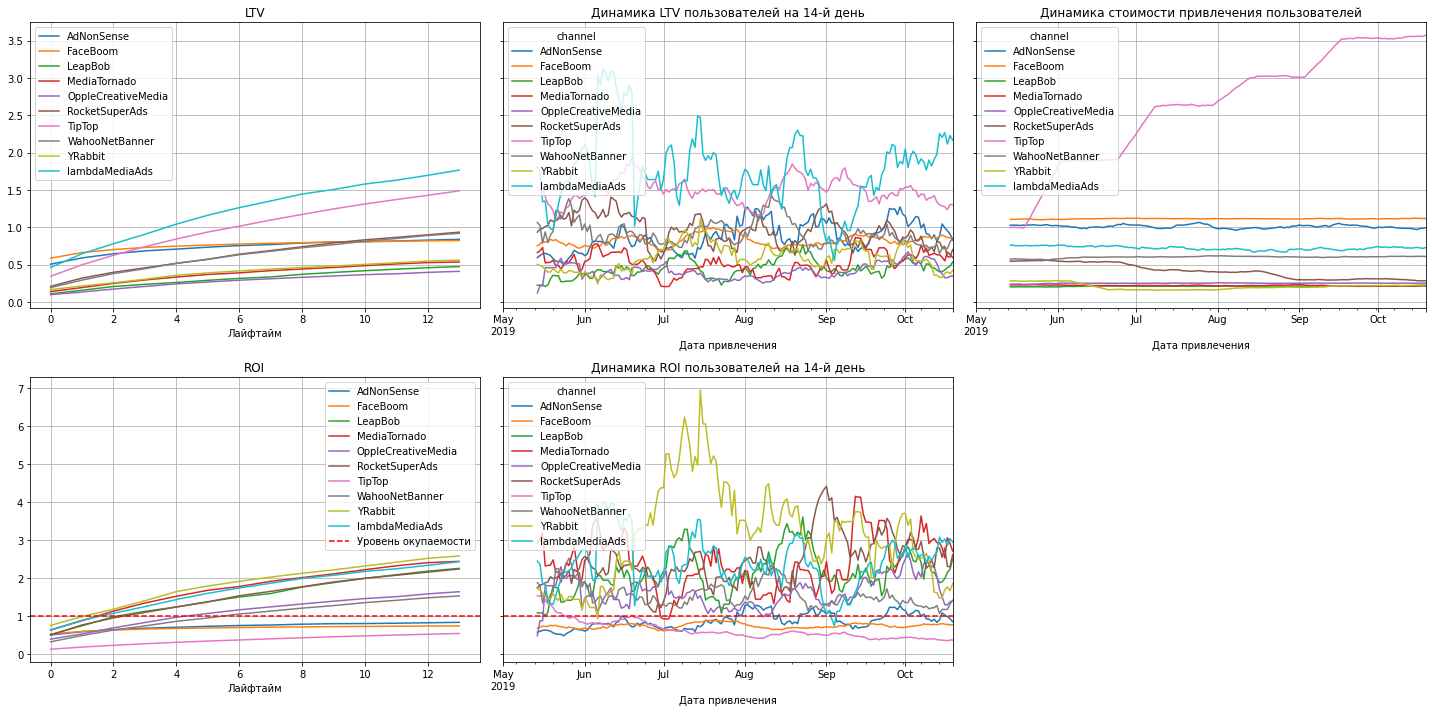

In [51]:
#анализ окупаемости рекламы с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Динамика стоимости привлечения пользователей наиболее высокая у канала TipTop. Но такие расходы не привели к окупаемости. У остальных динамика стабильная. Из 10 каналов только 3 находятся ниже уровня окупаемости, включая TipTop.

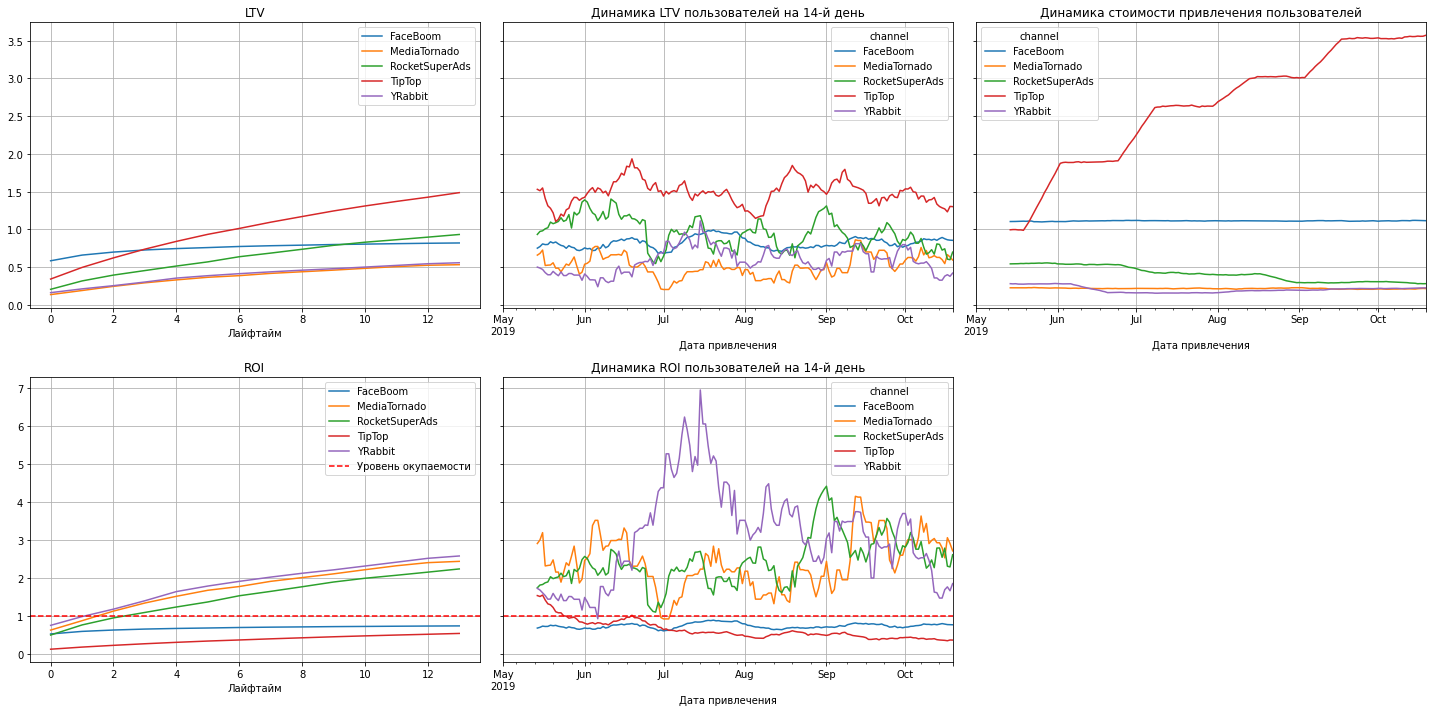

In [52]:
# oкупаемость рекламы с разбивкой по устройствам и рекламным каналам пользователей из США

# исключение из таблицы всех стран, кроме США
profiles_USA = profiles.query('region == "United States"')
# смотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В США динамика стоимости привлечения пользователей через TipTop была значительно выше, чем у других каналов, но расходы на рекламу не окупились.

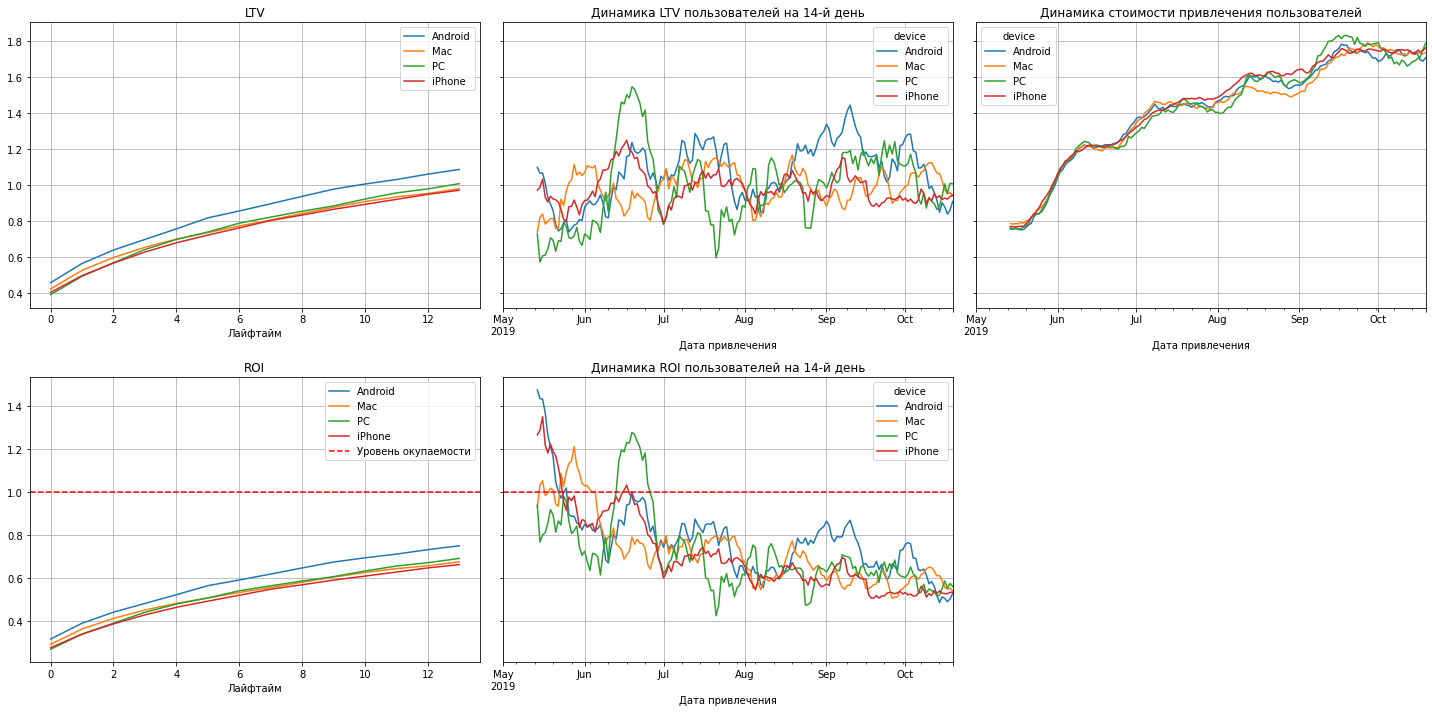

In [53]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В США динамика стоимости привлечения пользователей была практически одинаковой для всех устройств. Ни одно устройство не окупилось.

__Анализ с разбивкой по устройствам__

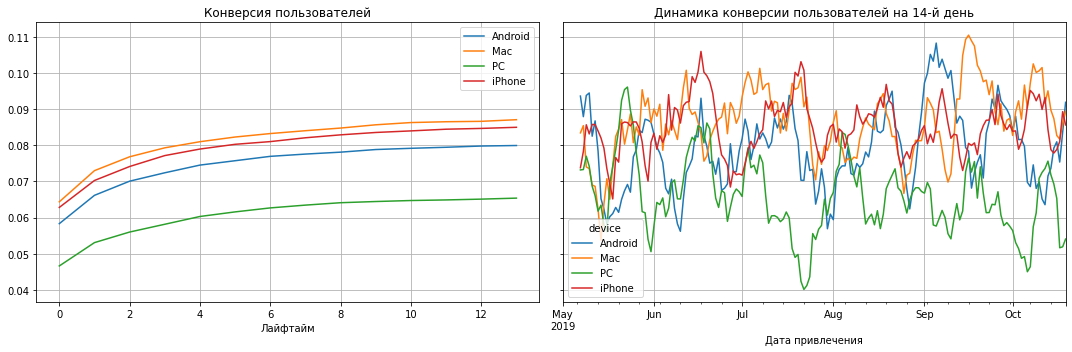

In [54]:
# конверсия с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Mac и iPhone конвертируются лучше остальных устройств, PC отстает. При этом по удержанию PC показал чуть более лучшие результаты.

__Анализ с разбивкой по регионам__

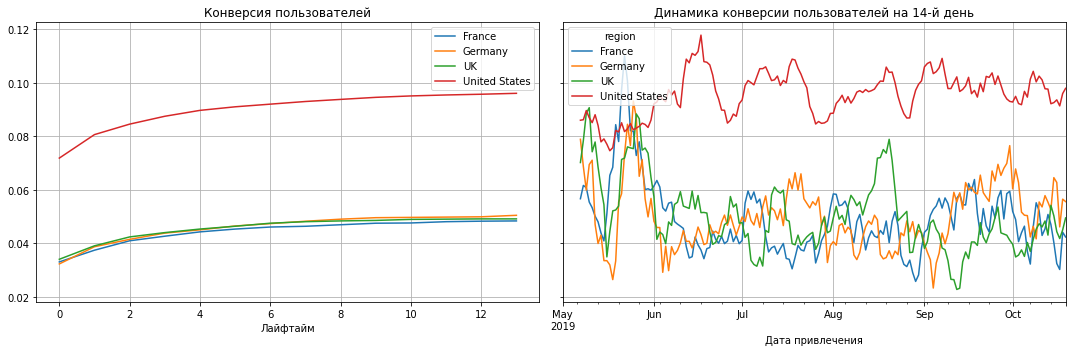

In [55]:
# конверсия с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

С разбивкой по регионам США примерно в 2 раза опережают по конверсии, но проигрывают по удержанию.

__Анализ с разбивкой по каналам__

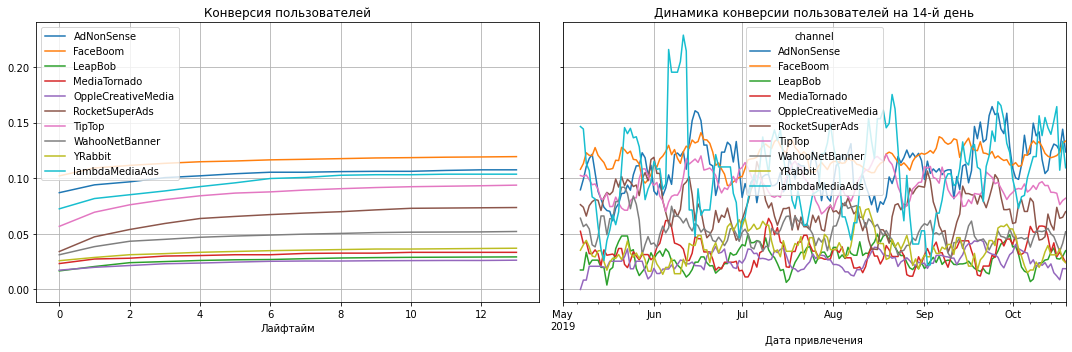

In [56]:

# конверсия с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

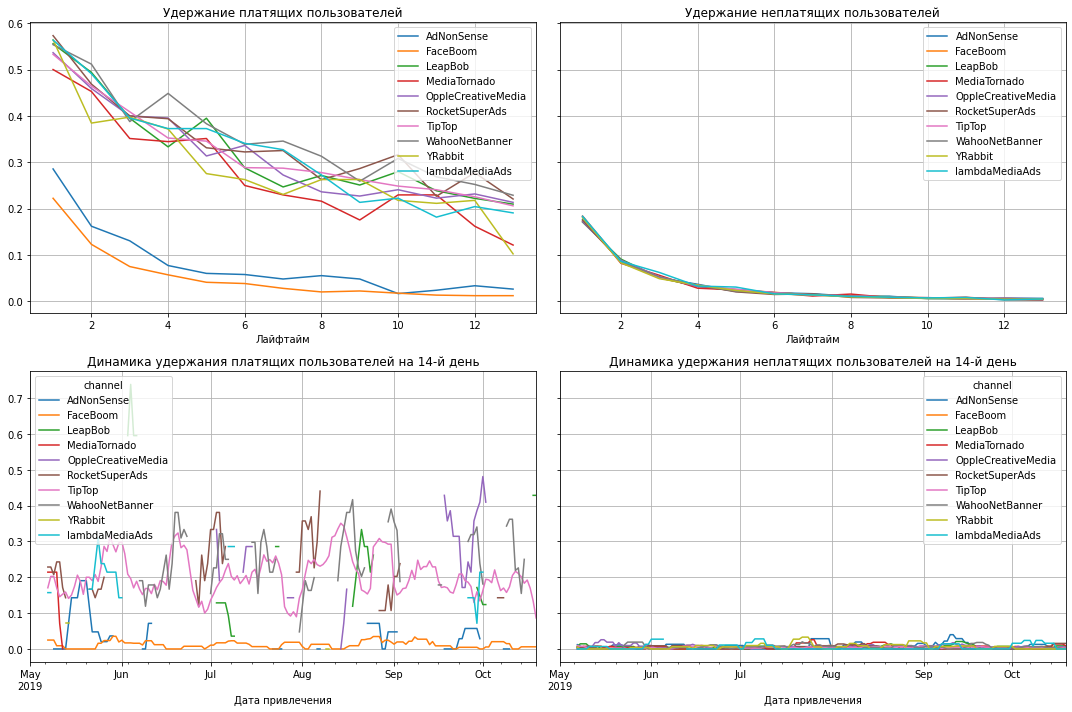

In [57]:
# удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

С разбивкой по каналам хуже всех удерживаются пользоватеи из FaceBoom, при этом опережая остальных по конверсии. Также одним из худших по удержанию оказался рекламный источник AdNonSense.

# Вывод
__В целом, окупаемость рекламы со временем падает, а стоимость привлечения пользователей растет. В рассматриваемый период реклама в итоге не окупилась.
Из всех стран США оказались единственной страной, которая продемонстрировала убытки по ROI. Возрастающие расходы на привлечение клиентов не оправдались.
В разрезе по устройствам выявлено снижение динамики окупаемости к 14 дню у всех девайсов при росте стоимости привлечения пользователей. Mac, iPhone и Android показали результаты ниже уровня окупаемости, при этом у них же выявлены наибольшие расходы на привлечение. В США пользователи всех устройств не принесли достаточно денег, чтобы реклама на них окупилась.
Чрезмерные расходы обнаружены на канал TipTop, который в результате не показал положительных результатов по ROI.__

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

# Вывод для отдела маркетинга: 
<div class="alert alert-info">
Была обрисована проблема что, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. И поставлена задача — разобраться в причинах и помочь компании выйти в плюс.  
    
В ходе исследования была просмотрена таблица, аномалий, дубликатов или пропущенных значений не обнаружено. Проведена предобработка таблицы: заменила заглавные буквы и пробелы на строчные буквы и нижнее подчеркивание. Значения столбцов с датами были преобразованы из строк в datetime64..  
    
Был проведён анализ данных, в ходе которого я изучила:  
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.    
    
Составлены профили пользователей, а также функции, которые помогают в дальнейшем анализе. 
Момент анализа составляет 1 ноября 2019 г., горизонт анализа - 14 дней.
Минимальная дата привлечения пользователей - 1 мая 2019 г. Максимальная дата с учетом горизонта - 19 октября 2019 г.
Пользователи из 4 стран: Германия, Фпанция, Великобритания, США. США лидируют по количеству пользователей приложения. Также и доля платящих пользователей выше в США - 7%.
Клиенты пользуются устройствами: iPhone, Android, Mac и PC. iPhone первый среди всех клиентов, включая платящих. Количество клиентов - 5448 тыс., среди них платящих пользователей - 3382. Доля платящих пользователей для iPhone, Android и Mac составляет 6%, для PC - 5%.  
    
Количество рекламных источников привлечения - 10. Но больше всего пользователей органических - 56449. Они же на третьем месте по количеству платящих пользователей в абсолютном выражении - 1160. Наибольшее количество пользователей из FaceBoom -29144 и TipTop - 19561.
Доля платящих пользователей распределена следующим образом:
FaceBoom - 12%
AdNonSense - 11%
TipTop - 10%
lambdaMediaAds - 10%.
Наименьшая доля платящих пользователей у тех, кто не пришел с рекламных источников - всего 2%      

Общая сумма расходов на маркетинг составила 105497.3. Наибольше расходы составили на канал TipTop - 54751,3. и FaceBoom - 32445,6. Расходы на остальные каналы существенно ниже, например, на третьем месте - WahooNetBanner с 5151. Последние места занимают канал YRabbit (944,22) и MediaTornado (954,48). Каждый месяц с мая по сентябрь расходы на маркетинг росли. График изменения расходов по времени показал, что траты на TipTop возрастали с каждым месяцем. Траты на FaceBoom росли гораздо медленнее.На остальные источники расходовали гораздо меньше.
Стоимость привлечения органических пользователей во всех когортах, распределенных по каналам, равна нулю, потому что они не были привлечены за счет рекламы. Привлечение одного пользователя из канал TipTop обошлось компании в среднем в 2,76, из FaceBoom - 1,11, из AdNonSense - 1,01. Если по большинству каналов расходы на протяжении всего времени были примерно равномерными, то TipTop выделяется, потому что расходы на одного пользователя росли почти каждый месяц. Средний CAC по всему проекту составил 0,69  
   
В целом, реклама в привлечение пользователей не окупилась. При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам выявлено, что причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей. Нужно оптимизировать расходы на рекламу. Реклама не окупилась только в США. Динамика стоимости привлечения пользователей показывает огромный разрыв расходов в США по сравнению с другими странами; стоимость в США существенно выше. Например, в разрезе по устройствам расходы окупились по пользователям PC, в разрезе по странам - из Франции, Германии и Великобритании. ROI 7 каналов из 10 оказались выше уровня окупаемости.  
    
Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется сократить финансирование там, где стоимость привлечения слишком большая - это расходы на пользователей из США и канал TipTop. В США пользователи всех устройств не принесли достаточно прибыли, хотя расходы на их привлечение постоянно росли, что также стоит учесть при принятии финансовых решений, целесообразны ли траты в таком объеме. Лучше финансировать другие регионы, в которых прибыль выше
    
</div>    